# Defining modified Rankin Scale (mRS) probability distributions for untreated patients, and predicted distributions if treatment given at time of stroke onset

## Plain English Summary

Disability levels may be measured in various ways. In this project we are using the modified Rankin Scale (mRS). It is a commonly used scale for measuring the degree of disability or dependence in the daily activities of people who have suffered a stroke.

The scale runs from 0-6, running from perfect health without symptoms to death:

| Score | Description |
|---|---|
| 0 | No symptoms. |
| 1 | No significant disability. Able to carry out all usual activities, despite some symptoms. |
| 2 | Slight disability. Able to look after own affairs without assistance, but unable to carry out all previous activities. |
| 3 | Moderate disability. Requires some help, but able to walk unassisted. |
| 4 | Moderately severe disability. Unable to attend to own bodily needs without assistance, and unable to walk unassisted. |
| 5 | Severe disability. Requires constant nursing care and attention, bedridden, incontinent. |
| 6 | Dead. |


When we predict the outcome of a person who has had a stroke, we want to be able to say what is the likely improvement in disability level they would experience due to the treatment.

The improvement they can get will depend on the time from when their stroke symptoms began and when they receive treatment. The best possible outcome would be if they were treated immediately after they had their stroke. The benefit of treatment reduces over time until the treatment no longer offer any benefit, and they will not be better off than having no treatment.

In this notebook we describe how we estimate the spread of disability levels if treatment was given immediately after the stroke, and what the spread of disability levels would be if the treatment was given at a time when it was no longer effective. These are two key pieces of information we will later use to estimate the spread of disability levels if we know the time after stroke symptoms began when a person was treated with either thrombolysis (clot-busting medication) or thrombectomy (physical removal of a clot). 

## Descriptions of the mRS data sets derived here, and basic methodology

**Pre-stroke mRS distributions**: Pre-stroke mRS distributions give the best possible outcome (i.e. 100% effective treatment). These distributions come from the SAMueL data set, and may be stratified by haemorrgage vs. infarction (ischaemic), and by NIHSS on arrival where, for ischaemic stroke, NIHSS 0-10 is taken as a surrogate for nLVO, and NIHSS 11+ is taken as a surrogate for LVO.

**nLVO baseline (no treatment effect)**: The weighted combination of the untreated control group of combined nLVO/LVO data from Lees et al. 2010 (67%) and the untreated control group of LVO-only data from Goyal et al. 2016 (33%). Weightings are chosen to match the P(mRS <= 1) of 46% (from the control group in Emberson with NIHSS of 0-10). This distribution is then corrected for the excess deaths due to treatment with IVT.

**nLVO t=0 treatment with IVT**: The weighted combination of pre-stroke mRS for patients with NIHSS 0-10 (61%) and untreated control group of nLVO (39%) distributions, where weights are chosen to match the P(mRS <= 1, t=0)=0.63. 63% is estimated from Emberson et al. 2014, where 46% of untreated patients with NIHSS 0-10 had mRS 0-1, and the odds ratio of mRS 0-1 extrapolates back to 2.0 at t=0. Pre-stroke mRS is for ischaemic stroke with NIHSS 0-10 (from the SAMueL data set). This distribution is then corrected for the excess deaths due to treatment with IVT,

**LVO baseline (no treatment effect)**: The control population from Goyal et al. 2016. This distribution is then corrected for the deaths due to treatment with IVT,

**LVO t=0 treatment with IVT**: Weighted combination of the no treatment LVO data from Goyal et al. 2016 (82%) and the pre-stroke mRS distribution (18%%, for ischaemic stroke with NIHSS 11+, from the SAMueL data set). The weights are chosen to match P(mRS <= 1) of 0.20 which is set as a target by extrapolating the control group mRS for patients with NIHSS 11+ from Emberson et al. 2014 back to a predicted odds ratio of mRS 0-1 of 2.0 at t=0. This distribution is then corrected for the excess deaths due to treatment with IVT.

**LVO t=0 treatment with MT**: The weighted combination of pre-stroke (75%) and untreated LVO at no-effect-time (25%). Hui et al. 2020 reported 75% successful recanalisation with thrombectomy. We assume that recanalisation at t=0 restores all pre-stroke function*. Pre-stroke mRS is for ischaemic stroke with NIHSS 11+ (from the SAMueL data set). This distribution is then corrected for the excess deaths due to treatment with MT.

*Extrapolating results of good outcome, when recanalisation has been achieved with thrombectomy, from Fransen et al. 2016 back to t=0, assuming 75% recanalisation, gives the same proportion of patients with mRS <= 2 as the pre-stroke mRS in the SAMueL data (therefore this extrapolation would suggest full recovery of all health with thrombectomy theoretically carried out at t=0).

### Deaths due to treatment

IVT deaths due to fatal intracranial haemorrhage (Emberson et al., 2014): 

| NIHSS | Treated | Control | Excess |
|-------|---------|---------|--------|
| 0-10  | 1.41%   | 0.32%   | 1.10%  |
| 11+   | 3.85%   | 0.45%   | 3.41%  |
| All   | 2.68%   | 0.39%   | 2.29%  |

Excess deaths due to IVT are assumed to occur independently of time. Differing risks of death are applied according to whether the patient in assumed nLVO (NIHSS 0-10 as a surrogate for nLVO) or LVO (NIHSS 11+, as a surrogate for LVO).

MT deaths (Goyal et al., 2016):

| Treated | Control | Excess |
|---------|---------|--------|
| 18.9%   | 15.3%   | 3.6%   |

The control group in Goyal et al. do not receive MT, but do receive other interventions such as IVT (used in 83% of patients). No additional IVT-related deaths need to be considered when modelling use of MT as the control group (used to estimate the effect of MT at a time MT is no longer effectivbe) already includes IVT-related excess deaths. 

### Proportion of ischaemic patients with LVO

#### Analysis of SAMueL data

The proportion of ischaemic patients with LVO may be estimated in various ways. Estimates are likely to be swayed by the population being studied (e.g. treatment trial results may under-estimate nLVO as very low severity patients may not be selected for the trial). Below are various estimated of the  relative occurrence of LVO and nLVO:

Data from SAMueL using NIHSS 11+ as a surrogate for LVO:

| Admission type                       | All arrivals | Arrival within 6 hrs known onset | Arrival within 4 hrs known onset |
|--------------------------------------|--------------|----------------------------------|----------------------------------|
| Proportion all admissions            | 1.0          | 42.9                             | 37.1                             |
| Proportion haemorrhagic              | 11.5         | 13.6                             | 14.1                             |
| Proportion ischaemic                 | 88.5         | 86.4                             | 85.9                             |
| Proportion ischaemic with NIHSS 0-10 | 74.9         | 67.4                             | 65.7                             |
| Proportion ischaemic with NIHSS 11+  | 25.1         | 32.6                             | 34.3                             |

For original analysis see: https://samuel-book.github.io/samuel-1/descriptive_stats/10_using_nihss_10_for_lvo.html

#### RACECAT pre-hospital diagnosis of LVO

A breakdown on stroke type from , 20the design of the RACE test for pre-hopsital diagnosis of LVO (de la Ossa Herrero et al., 2013). Note - there appears to be some discrepancies between reporting of the results between the text and the detailed breakdown by RACE score in figure 2 of the paper.

* Trial recruited from patients who presented at the emergency department within 6 hours from symptoms onset.

* In the text: Of 357 patients in the analysis, the stroke subtype was ischemic stroke in 240 (67.2%), hemorrhagic stroke in 52 (14.6%), transient ischemic attack in 20 (5.6%), and stroke mimic in 45 (12.6%). LVO was detected in 76 patients (31.7% of ischaemic strokes).

* In figure 2: Of 357 patients in the analysis, the stroke subtype was ischemic stroke in 260 (72.8), hemorrhagic stroke in 52 (14.6%), and stroke mimic in 45 (12.6%). LVO was detected in 99 patients (38.1% of ischaemic strokes). It appears that TIAs may be counted in with ischaemic strokes in this analysis.

#### Estimating the number of UK stroke patients eligible for endovascular thrombectomy (review/analysis)

McMeekin et al. (2017) review the evdidence for estimating the number of UK stroke patients eligible for endovascular thrombectomy. They estimate:

* 40% of ischaemic stroke patients have LVO; 80% of which have NIHSS >=6 and say be suitable for thrombectomy. This is equivalent to 32% of admitted patients having LVO suitable for thrombectomy.

## Import packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set NumPy and Pandas to print 4 decimal places
np.set_printoptions(precision=4)
pd.set_option("display.precision", 4)

## Set up dictionaries for results

In [2]:
all_distributions_bins = dict()
all_distributions_cumsum = dict()

## Pre-stroke mRS distributions

Pre-stroke mRS distributions come from SSNAP data. They are used to estimate the best possible outcome from treatment. 

### nLVO pre-stroke mRS distribution

In [3]:
# Pre-stroke nLVO uses pre-stroke mRS from SAMueL wfor patients with ischaemic
# stroke and NIHSS 0-10.

# Define distribution from data
pre_stroke_nlvo_bins = np.array([
    0.582881, 0.162538, 0.103440, 0.102223, 0.041973, 0.006945, 0.0])

# Normalise
pre_stroke_nlvo_bins = pre_stroke_nlvo_bins /np.sum(pre_stroke_nlvo_bins)
all_distributions_bins['pre_stroke_nlvo'] = pre_stroke_nlvo_bins

# Make cumulative distribution
pre_stroke_nlvo_cumsum = np.cumsum(pre_stroke_nlvo_bins)
all_distributions_cumsum['pre_stroke_nlvo'] = pre_stroke_nlvo_cumsum

# Show
print('Pre-stroke nLVO')
print('---------------')
print('mRS bins:')
print(repr(pre_stroke_nlvo_bins))
print()
print('mRS cumulative:')
print(repr(pre_stroke_nlvo_cumsum))

Pre-stroke nLVO
---------------
mRS bins:
array([0.5829, 0.1625, 0.1034, 0.1022, 0.042 , 0.0069, 0.    ])

mRS cumulative:
array([0.5829, 0.7454, 0.8489, 0.9511, 0.9931, 1.    , 1.    ])


#### Add IVT extra deaths:

In [4]:
pre_stroke_nlvo_bins_ivt_deaths = np.copy(pre_stroke_nlvo_bins)

# Correct deaths to be deaths due to haemorrhage seen by Emberson et al
excess_deaths = 0.011
pre_stroke_nlvo_bins_ivt_deaths[6] += excess_deaths
correction_mrs_0_to_5 = (
    (np.sum(pre_stroke_nlvo_bins_ivt_deaths[0:6]) - excess_deaths) / 
    (np.sum(pre_stroke_nlvo_bins_ivt_deaths[0:6])))
pre_stroke_nlvo_bins_ivt_deaths[0:6] *= correction_mrs_0_to_5
pre_stroke_nlvo_cumsum_ivt_deaths = np.cumsum(pre_stroke_nlvo_bins_ivt_deaths)

# Store
all_distributions_bins['pre_stroke_nlvo_ivt_deaths'] = \
    pre_stroke_nlvo_bins_ivt_deaths
all_distributions_cumsum['pre_stroke_nlvo_ivt_deaths'] = \
    pre_stroke_nlvo_cumsum_ivt_deaths

# Show
print('Pre-stroke nLVO with IVT deaths')
print('-------------------------------')
print('mRS bins:')
print(repr(pre_stroke_nlvo_bins_ivt_deaths))
print()
print('mRS cumulative:')
print(repr(pre_stroke_nlvo_cumsum_ivt_deaths))

Pre-stroke nLVO with IVT deaths
-------------------------------
mRS bins:
array([0.5765, 0.1608, 0.1023, 0.1011, 0.0415, 0.0069, 0.011 ])

mRS cumulative:
array([0.5765, 0.7372, 0.8395, 0.9406, 0.9821, 0.989 , 1.    ])


### LVO pre-stroke mRS distribution

In [5]:
# Pre-stroke nLVO uses pre-stroke mRS from SAMueL wfor patients with ischaemic
# stroke and NIHSS 0-10.

# Define distribution from data
pre_stroke_lvo_bins = np.array([
    0.417894, 0.142959, 0.118430, 0.164211, 0.113775, 0.042731, 0.0])

# Normalise
pre_stroke_lvo_bins = pre_stroke_lvo_bins /np.sum(pre_stroke_lvo_bins)
all_distributions_bins['pre_stroke_lvo'] = pre_stroke_lvo_bins

# Make cumulative distribution
pre_stroke_lvo_cumsum = np.cumsum(pre_stroke_lvo_bins)
all_distributions_cumsum['pre_stroke_lvo'] = pre_stroke_lvo_cumsum

# Show
print('Pre-stroke LVO')
print('--------------')
print('mRS bins:')
print(repr(pre_stroke_lvo_bins))
print()
print('mRS cumulative:')
print(repr(pre_stroke_lvo_cumsum))

Pre-stroke LVO
--------------
mRS bins:
array([0.4179, 0.143 , 0.1184, 0.1642, 0.1138, 0.0427, 0.    ])

mRS cumulative:
array([0.4179, 0.5609, 0.6793, 0.8435, 0.9573, 1.    , 1.    ])


#### Add IVT extra deaths:

In [6]:
pre_stroke_lvo_bins_ivt_deaths = np.copy(pre_stroke_lvo_bins)

# Correct deaths to be 3.41% deaths due to haemorrhage
excess_deaths = 0.0341
pre_stroke_lvo_bins_ivt_deaths[6] += excess_deaths
correction_mrs_0_to_5 = (
    (np.sum(pre_stroke_lvo_bins_ivt_deaths[0:6]) - excess_deaths) / 
    (np.sum(pre_stroke_lvo_bins_ivt_deaths[0:6])))
pre_stroke_lvo_bins_ivt_deaths[0:6] *= correction_mrs_0_to_5
pre_stroke_lvo_cumsum_ivt_deaths = np.cumsum(pre_stroke_lvo_bins_ivt_deaths)

# Store
all_distributions_bins['pre_stroke_lvo_ivt_deaths'] = \
    pre_stroke_lvo_bins_ivt_deaths
all_distributions_cumsum['pre_stroke_lvo_ivt_deaths'] = \
    pre_stroke_lvo_cumsum_ivt_deaths

# Show
print('Pre-stroke lvo with IVT deaths')
print('------------------------------')
print('mRS bins:')
print(repr(pre_stroke_lvo_bins_ivt_deaths))
print()
print('mRS cumulative:')
print(repr(pre_stroke_lvo_cumsum_ivt_deaths))

Pre-stroke lvo with IVT deaths
------------------------------
mRS bins:
array([0.4036, 0.1381, 0.1144, 0.1586, 0.1099, 0.0413, 0.0341])

mRS cumulative:
array([0.4036, 0.5417, 0.6561, 0.8147, 0.9246, 0.9659, 1.    ])


#### Add MT extra deaths:

In [7]:
pre_stroke_lvo_bins_mt_deaths = np.copy(pre_stroke_lvo_bins)

# Correct deaths to be excess 3.6% deaths
excess_deaths = 0.036
pre_stroke_lvo_bins_mt_deaths[6] += excess_deaths
correction_mrs_0_to_5 = (
    (np.sum(pre_stroke_lvo_bins_mt_deaths[0:6]) - excess_deaths) / 
    (np.sum(pre_stroke_lvo_bins_mt_deaths[0:6])))
pre_stroke_lvo_bins_mt_deaths[0:6] *= correction_mrs_0_to_5
pre_stroke_lvo_cumsum_mt_deaths = np.cumsum(pre_stroke_lvo_bins_mt_deaths)

# Store
all_distributions_bins['pre_stroke_lvo_mt_deaths'] = \
    pre_stroke_lvo_bins_mt_deaths
all_distributions_cumsum['pre_stroke_lvo_mt_deaths'] = \
    pre_stroke_lvo_cumsum_mt_deaths

# Show
print('Pre-stroke lvo with mt deaths')
print('-----------------------------')
print('mRS bins:')
print(repr(pre_stroke_lvo_bins_mt_deaths))
print()
print('mRS cumulative:')
print(repr(pre_stroke_lvo_cumsum_mt_deaths))

Pre-stroke lvo with mt deaths
-----------------------------
mRS bins:
array([0.4028, 0.1378, 0.1142, 0.1583, 0.1097, 0.0412, 0.036 ])

mRS cumulative:
array([0.4028, 0.5407, 0.6548, 0.8131, 0.9228, 0.964 , 1.    ])


## nLVO baseline (no treatment effect)

The weighted combination of the untreated control group of combined nLVO/LVO data from Lees et al. 2010 (100%) and the untreated control group of LVO-only data from Goyal et al. 2016. Weightings are chosen to match the P(mRS <= 1) of 46% (from the control group in Emberson with NIHSS of 0-10).

The distribution is corrected for 1.1% excess deaths in the IVT-treated group (from Emberson et al., 2014, using NIHSS 0-10 as a surrogate for nLVO).

Set up required distributions from data.

In [8]:
# Define distributions from data
no_treatment_nlvo_lvo_bins = np.array(
    [0.1486, 0.2022, 0.1253, 0.1397, 0.1806, 0.0861, 0.1175])

no_treatment_lvo_bins = np.array(
    [0.050, 0.079, 0.136, 0.164, 0.247, 0.135, 0.189])

# Normalise
no_treatment_nlvo_lvo_bins = (
    no_treatment_nlvo_lvo_bins / np.sum(no_treatment_nlvo_lvo_bins))

no_treatment_lvo_bins = (
    no_treatment_lvo_bins / np.sum(no_treatment_lvo_bins))

# Make cumulative distribution
no_treatment_nlvo_lvo_cumsum = np.cumsum(no_treatment_nlvo_lvo_bins)
no_treatment_lvo_cumsum = np.cumsum(no_treatment_lvo_bins)

# Show
print('nLVO-LVO combined no treatment effect')
print('-------------------------------------')
print('mRS bins:')
print(repr(no_treatment_nlvo_lvo_bins))
print()
print('mRS cumulative:')
print(repr(no_treatment_nlvo_lvo_cumsum))
print()
print('LVO combined no treatment effect')
print('-------------------------------------')
print('mRS bins:')
print(repr(no_treatment_lvo_bins))
print()
print('mRS cumulative:')
print(repr(no_treatment_lvo_cumsum))

nLVO-LVO combined no treatment effect
-------------------------------------
mRS bins:
array([0.1486, 0.2022, 0.1253, 0.1397, 0.1806, 0.0861, 0.1175])

mRS cumulative:
array([0.1486, 0.3508, 0.4761, 0.6158, 0.7964, 0.8825, 1.    ])

LVO combined no treatment effect
-------------------------------------
mRS bins:
array([0.05 , 0.079, 0.136, 0.164, 0.247, 0.135, 0.189])

mRS cumulative:
array([0.05 , 0.129, 0.265, 0.429, 0.676, 0.811, 1.   ])


### Add in extra IVT deaths (combined nLVO/LVO):

In [9]:
no_treatment_nlvo_lvo_bins_ivt_deaths = np.copy(no_treatment_nlvo_lvo_bins)

# Correct deaths to 2.29% deaths due to haemorrhage
excess_deaths = 0.0229
no_treatment_nlvo_lvo_bins_ivt_deaths[6] += excess_deaths
correction_mrs_0_to_5 = (
    (np.sum(no_treatment_nlvo_lvo_bins_ivt_deaths[0:6]) - excess_deaths) / 
    (np.sum(no_treatment_nlvo_lvo_bins_ivt_deaths[0:6])))
no_treatment_nlvo_lvo_bins_ivt_deaths[0:6] *= correction_mrs_0_to_5
no_treatment_nlvo_lvo_cumsum_ivt_deaths = np.cumsum(no_treatment_nlvo_lvo_bins_ivt_deaths)

# Show
print('No treatment combined nlvo/lvo with IVT deaths')
print('----------------------------------------------')
print('mRS bins:')
print(repr(no_treatment_nlvo_lvo_bins_ivt_deaths))
print()
print('mRS cumulative:')
print(repr(no_treatment_nlvo_lvo_cumsum_ivt_deaths))

No treatment combined nlvo/lvo with IVT deaths
----------------------------------------------
mRS bins:
array([0.1447, 0.197 , 0.122 , 0.1361, 0.1759, 0.0839, 0.1404])

mRS cumulative:
array([0.1447, 0.3417, 0.4637, 0.5998, 0.7757, 0.8596, 1.    ])


### Add in extra IVT deaths (LVO):

In [10]:
no_treatment_lvo_bins_ivt_deaths = np.copy(no_treatment_lvo_bins)

# Correct deaths 3.41% deaths due to haemorrhage
excess_deaths = 0.0341
no_treatment_lvo_bins_ivt_deaths[6] += excess_deaths
correction_mrs_0_to_5 = (
    (np.sum(no_treatment_lvo_bins_ivt_deaths[0:6]) - excess_deaths) / 
    (np.sum(no_treatment_lvo_bins_ivt_deaths[0:6])))
no_treatment_lvo_bins_ivt_deaths[0:6] *= correction_mrs_0_to_5
no_treatment_lvo_cumsum_ivt_deaths = np.cumsum(no_treatment_lvo_bins_ivt_deaths)

# Show
print('No treatment combined lvo with IVT deaths')
print('-----------------------------------------')
print('mRS bins:')
print(repr(no_treatment_lvo_bins_ivt_deaths))
print()
print('mRS cumulative:')
print(repr(no_treatment_lvo_cumsum_ivt_deaths))

No treatment combined lvo with IVT deaths
-----------------------------------------
mRS bins:
array([0.0479, 0.0757, 0.1303, 0.1571, 0.2366, 0.1293, 0.2231])

mRS cumulative:
array([0.0479, 0.1236, 0.2539, 0.411 , 0.6476, 0.7769, 1.    ])


### Calculate a weighted distribution of LVO and nLVO

Calculate the weights needed to give a distribution with P(mRS <-1, t=tne) = 46%

#### Without IVT deaths

In [11]:
target_diff  = (0.46)  - no_treatment_nlvo_lvo_cumsum[1]
current_diff = (no_treatment_lvo_cumsum[1] - 
                no_treatment_nlvo_lvo_cumsum[1])

weight_lvo   = target_diff / current_diff
weight_nlvo_lvo = 1.0 - weight_lvo

print(f'Weights: {weight_lvo:.4f},', f'{weight_nlvo_lvo:.4f}')

Weights: -0.4923, 1.4923


Apply the weights

In [12]:
# Apply weights
no_treatment_nlvo_bins = (
    (weight_nlvo_lvo * no_treatment_nlvo_lvo_bins) + 
    (weight_lvo      * no_treatment_lvo_bins) )

# Normalise
no_treatment_nlvo_bins = (
    no_treatment_nlvo_bins / np.sum(no_treatment_nlvo_bins))

# Make cumulative distribution (before correction for deaths)
no_treatment_nlvo_cumsum = np.cumsum(no_treatment_nlvo_bins)

# Copy, to add trteament deaths
no_effect_nlvo_ivt_bins = np.copy(no_treatment_nlvo_bins)

# Store
all_distributions_bins['no_treatment_nlvo'] = no_effect_nlvo_ivt_bins

# Make cumulative distribution
no_effect_nlvo_cumsum = np.cumsum(no_effect_nlvo_ivt_bins)
all_distributions_cumsum['no_treatment_nlvo'] = no_effect_nlvo_cumsum

# Show
print('nLVO no treatment effect')
print('------------------------')
print('mRS bins:')
print(repr(no_effect_nlvo_ivt_bins))
print()
print('mRS cumulative:')
print(repr(no_effect_nlvo_cumsum))

nLVO no treatment effect
------------------------
mRS bins:
array([0.1971, 0.2629, 0.12  , 0.1277, 0.1479, 0.062 , 0.0823])

mRS cumulative:
array([0.1971, 0.46  , 0.58  , 0.7078, 0.8557, 0.9177, 1.    ])


#### With IVT deaths

In [13]:
target_diff  = 0.46  - no_treatment_nlvo_lvo_cumsum_ivt_deaths[1]
current_diff = (no_treatment_lvo_cumsum_ivt_deaths[1] - 
                no_treatment_nlvo_lvo_cumsum_ivt_deaths[1])

weight_lvo   = target_diff / current_diff
weight_nlvo_lvo = 1.0 - weight_lvo

print(f'Weights: {weight_lvo:.4f},', f'{weight_nlvo_lvo:.4f}')

Weights: -0.5424, 1.5424


Apply the weights

In [14]:
# Apply weights
no_treatment_nlvo_bins_ivt_deaths = (
    (weight_nlvo_lvo * no_treatment_nlvo_lvo_bins_ivt_deaths) + 
    (weight_lvo      * no_treatment_lvo_bins_ivt_deaths) )

# Normalise
no_treatment_nlvo_bins_ivt_deaths = (no_treatment_nlvo_bins_ivt_deaths / 
                                     np.sum(no_treatment_nlvo_bins_ivt_deaths))

# Make cumulative distribution (before correction for deaths)
no_treatment_nlvo_cumsum_ivt_deaths = \
    np.cumsum(no_treatment_nlvo_bins_ivt_deaths)

# Copy, to add trteament deaths
no_effect_nlvo_ivt_bins_ivt_deaths = np.copy(no_treatment_nlvo_bins_ivt_deaths)

# Store
all_distributions_bins['no_effect_nlvo_ivt_deaths'] = \
    no_effect_nlvo_ivt_bins_ivt_deaths

# Make cumulative distribution
no_effect_nlvo_cumsum_ivt_deaths = np.cumsum(no_treatment_nlvo_bins_ivt_deaths)
all_distributions_cumsum['no_effect_nlvo_ivt_deaths'] = \
    no_effect_nlvo_cumsum_ivt_deaths

# Show
print('nLVO no treatment effect_ivt_deaths')
print('-----------------------------------')
print('mRS bins:')
print(repr(no_effect_nlvo_ivt_bins_ivt_deaths))
print()
print('mRS cumulative:')
print(repr(no_effect_nlvo_cumsum_ivt_deaths))

nLVO no treatment effect_ivt_deaths
-----------------------------------
mRS bins:
array([0.1973, 0.2627, 0.1176, 0.1247, 0.143 , 0.0592, 0.0955])

mRS cumulative:
array([0.1973, 0.46  , 0.5776, 0.7023, 0.8452, 0.9045, 1.    ])


## nLVO t=0 treatment with IVT

The weighted combination of pre-stroke mRS for patients with NIHSS 0-10 and untreated control group of nLVO distributions, where weights are chosen to match the P(mRS <= 1, t=0)=0.63. 63% is estimated from Emberson et al. 2014, where 46% of untreated patients with NIHSS 0-10 had mRS 0-1, and the odds ratio of mRS 0-1 extrapolates back to 2.0 at t=0. Pre-stroke mRS is for ischaemic stroke with NIHSS 0-10 (from the SAMueL data set).

The distribution is corrected for 1.1% excess deaths in the IVT-treated group (from Emberson et al., 2014, using NIHSS 0-10 as a surrogate for nLVO).

Calculate weights

In [15]:
target_diff  = 0.63  - no_treatment_nlvo_cumsum_ivt_deaths[1]
current_diff = (pre_stroke_nlvo_cumsum_ivt_deaths[1] - 
                no_treatment_nlvo_cumsum_ivt_deaths[1])

weight_pre_stroke_nlvo   = target_diff / current_diff
weight_no_treatment_nlvo = 1.0 - weight_pre_stroke_nlvo

print(f'Weights (pre-stroke, no_treatment): {weight_pre_stroke_nlvo:.4f},',
      f'{weight_no_treatment_nlvo:.4f}')

Weights (pre-stroke, no_treatment): 0.6132, 0.3868


Apply the weights.

In [16]:
#Apply weights
t0_treatment_nlvo_ivt_bins = (
    (weight_pre_stroke_nlvo   * pre_stroke_nlvo_bins_ivt_deaths) +
    (weight_no_treatment_nlvo * no_treatment_nlvo_bins_ivt_deaths))

# Normalise
t0_treatment_nlvo_ivt_bins = (
    t0_treatment_nlvo_ivt_bins / np.sum(t0_treatment_nlvo_ivt_bins))

# Store
all_distributions_bins['t0_treatment_nlvo_ivt'] = t0_treatment_nlvo_ivt_bins

# Make cumulative distribution
t0_treatment_nlvo_ivt_cumsum = np.cumsum(t0_treatment_nlvo_ivt_bins)
all_distributions_cumsum['t0_treatment_nlvo_ivt'] = t0_treatment_nlvo_ivt_cumsum

# Show
print('nLVO IVT t0 treatment effect')
print('----------------------------')
print('mRS bins:')
print(repr(t0_treatment_nlvo_ivt_bins))
print()
print('mRS cumulative:')
print(repr(t0_treatment_nlvo_ivt_cumsum))

nLVO IVT t0 treatment effect
----------------------------
mRS bins:
array([0.4298, 0.2002, 0.1082, 0.1102, 0.0808, 0.0271, 0.0437])

mRS cumulative:
array([0.4298, 0.63  , 0.7382, 0.8484, 0.9292, 0.9563, 1.    ])


## LVO baseline (no treatment effect)

The control population from Goyal et al. 2016, with added MT-related excess deaths.

No correction for IVT-related deaths is needed when LVO is treated with MT as the Goyal control group includes use of IVT.

In [17]:
# LVO Baseline distributions were defined in cell 5
all_distributions_bins['no_treatment_lvo'] = no_treatment_lvo_bins
all_distributions_cumsum['no_treatment_lvo'] = no_treatment_lvo_cumsum

# Show
print('LVO no treatment effect')
print('------------------------')
print('mRS bins:')
print(repr(no_treatment_lvo_bins))
print()
print('mRS cumulative:')
print(repr(no_treatment_lvo_cumsum))

LVO no treatment effect
------------------------
mRS bins:
array([0.05 , 0.079, 0.136, 0.164, 0.247, 0.135, 0.189])

mRS cumulative:
array([0.05 , 0.129, 0.265, 0.429, 0.676, 0.811, 1.   ])


### With IVT deaths:

In [18]:
# LVO Baseline distributions were defined in cell 5
all_distributions_bins['no_effect_lvo_ivt_deaths'] = \
    no_treatment_lvo_bins_ivt_deaths
all_distributions_cumsum['no_effect_lvo_ivt_deaths'] = \
    no_treatment_lvo_cumsum_ivt_deaths

# Show
print('LVO no treatment effect IVT deaths')
print('----------------------------------')
print('mRS bins:')
print(repr(no_treatment_lvo_bins_ivt_deaths))
print()
print('mRS cumulative:')
print(repr(no_treatment_lvo_cumsum_ivt_deaths))

LVO no treatment effect IVT deaths
----------------------------------
mRS bins:
array([0.0479, 0.0757, 0.1303, 0.1571, 0.2366, 0.1293, 0.2231])

mRS cumulative:
array([0.0479, 0.1236, 0.2539, 0.411 , 0.6476, 0.7769, 1.    ])


### With MT deaths:

In [19]:
no_treatment_lvo_bins_mt_deaths = np.copy(no_treatment_lvo_bins)

# Correct deaths 3.85% deaths due to haemorrhage
excess_deaths = 0.0385
no_treatment_lvo_bins_mt_deaths[6] += excess_deaths
correction_mrs_0_to_5 = (
    (np.sum(no_treatment_lvo_bins_mt_deaths[0:6]) - excess_deaths) / 
    (np.sum(no_treatment_lvo_bins_mt_deaths[0:6])))
no_treatment_lvo_bins_mt_deaths[0:6] *= correction_mrs_0_to_5
no_treatment_lvo_cumsum_mt_deaths = np.cumsum(no_treatment_lvo_bins_mt_deaths)

# Show
print('No treatment combined lvo with mt deaths')
print('-----------------------------------------')
print('mRS bins:')
print(repr(no_treatment_lvo_bins_mt_deaths))
print()
print('mRS cumulative:')
print(repr(no_treatment_lvo_cumsum_mt_deaths))

No treatment combined lvo with mt deaths
-----------------------------------------
mRS bins:
array([0.0476, 0.0752, 0.1295, 0.1562, 0.2353, 0.1286, 0.2275])

mRS cumulative:
array([0.0476, 0.1229, 0.2524, 0.4086, 0.6439, 0.7725, 1.    ])


In [20]:
# LVO Baseline distributions were defined in cell 5
all_distributions_bins['no_effect_lvo_mt_deaths'] = \
    no_treatment_lvo_bins_mt_deaths
all_distributions_cumsum['no_effect_lvo_mt_deaths'] = \
    no_treatment_lvo_cumsum_mt_deaths

# Show
print('LVO no treatment effect mt deaths')
print('----------------------------------')
print('mRS bins:')
print(repr(no_treatment_lvo_bins_mt_deaths))
print()
print('mRS cumulative:')
print(repr(no_treatment_lvo_cumsum_mt_deaths))

LVO no treatment effect mt deaths
----------------------------------
mRS bins:
array([0.0476, 0.0752, 0.1295, 0.1562, 0.2353, 0.1286, 0.2275])

mRS cumulative:
array([0.0476, 0.1229, 0.2524, 0.4086, 0.6439, 0.7725, 1.    ])


## LVO t=0 treatment with IVT

Weighted combination of the no treatment LVO data from Goyal et al. 2016 and the pre-stroke mRS distribution (for ischaemic stroke with NIHSS 11+, from the SAMueL data set). The weights are chosen to match P(mRS <= 1) of 0.20 which is set as a target by extrapolating the control group mRS for patients with NIHSS 11+ from Emberson et al. 2014 back to a predicted odds ratio of mRS 0-1 of 2.0 at t=0.

The distribution is corrected for 3.4% excess deaths in the IVT-treated group (from Emberson et al., 2014, using NIHSS 11+ as a surrogate for LVO).

Calculate the weights needed to give a distribution with P(mRS <=1, t=0) = 20%.

In [21]:
target_diff  = 0.20 - pre_stroke_lvo_cumsum_ivt_deaths[1]
current_diff = (no_treatment_lvo_cumsum_ivt_deaths[1] - 
                pre_stroke_lvo_cumsum_ivt_deaths[1])

weight_no_treatment_lvo   = target_diff / current_diff
weight_pre_stroke_lvo = 1.0 - weight_no_treatment_lvo

print(
    f'Weights: {weight_no_treatment_lvo:.4f},', f'{weight_pre_stroke_lvo:.4f}')

Weights: 0.8172, 0.1828


Apply the weights.

In [22]:
# Apply weights
t0_treatment_lvo_ivt_bins = (
    (weight_pre_stroke_lvo   * pre_stroke_lvo_bins_ivt_deaths) +
    (weight_no_treatment_lvo * no_treatment_lvo_bins_ivt_deaths))

# Normalise
t0_treatment_lvo_ivt_bins = (
    t0_treatment_lvo_ivt_bins / np.sum(t0_treatment_lvo_ivt_bins))

all_distributions_bins['t0_treatment_lvo_ivt'] = t0_treatment_lvo_ivt_bins

# Make cumulative distribution
t0_treatment_lvo_ivt_cumsum = np.cumsum(t0_treatment_lvo_ivt_bins)
all_distributions_cumsum['t0_treatment_lvo_ivt'] = t0_treatment_lvo_ivt_cumsum

# Show
print('LVO t0 IVT treatment effect')
print('---------------------------')
print('mRS bins:')
print(repr(t0_treatment_lvo_ivt_bins))
print()
print('mRS cumulative:')
print(repr(t0_treatment_lvo_ivt_cumsum))

LVO t0 IVT treatment effect
---------------------------
mRS bins:
array([0.1129, 0.0871, 0.1274, 0.1574, 0.2135, 0.1132, 0.1886])

mRS cumulative:
array([0.1129, 0.2   , 0.3274, 0.4848, 0.6982, 0.8114, 1.    ])


## LVO t=0 treatment with MT

The weighted combination of pre-stroke (75%) and untreated LVO at no-effect-time (25%). Hui et al. 2020 reported 75% successful recanalisation with thrombectomy. We assume that recanalisation at t=0 restores all pre-stroke function*. Pre-stroke mRS is for ischaemic stroke with NIHSS 11+ (from the SAMueL data set).

*Extrapolating results of good outcome, when recanalisation has been achieved with thrombectomy, from Fransen et al. 2016 back to t=0, assuming 75% recanalisation, gives the same proportion of patients with mRS <= 2 as the pre-stroke mRS in the SAMueL data (therefore this extrapolation would suggest full recovery of all health with thrombectomy theoretically carried out at t=0).

In [23]:
weight_pre_stroke_lvo = 0.75
weight_no_treatment_lvo = 1.0 - weight_pre_stroke_lvo

print(f'Weights: {weight_pre_stroke_lvo:.4f},' \
      f'{weight_no_treatment_lvo:.4f}')

Weights: 0.7500,0.2500


Apply the weights

In [24]:
# Apply weights
t0_treatment_lvo_mt_bins = (
    (weight_pre_stroke_lvo   * pre_stroke_lvo_bins_mt_deaths) +
    (weight_no_treatment_lvo * no_treatment_lvo_bins_mt_deaths))

# Normalise
t0_treatment_lvo_mt_bins = (
    t0_treatment_lvo_mt_bins / np.sum(t0_treatment_lvo_mt_bins))
all_distributions_bins['t0_treatment_lvo_mt'] = t0_treatment_lvo_mt_bins

# Make cumulative distribution
t0_treatment_lvo_mt_cumsum = np.cumsum(t0_treatment_lvo_mt_bins)
all_distributions_cumsum['t0_treatment_lvo_mt'] = t0_treatment_lvo_mt_cumsum

# Show
print('LVO MT t0 treatment effect')
print('--------------------------')
print('mRS bins:')
print(repr(t0_treatment_lvo_mt_bins))
print()
print('mRS cumulative:')
print(repr(t0_treatment_lvo_mt_cumsum))

LVO MT t0 treatment effect
--------------------------
mRS bins:
array([0.314 , 0.1222, 0.118 , 0.1578, 0.1411, 0.063 , 0.0839])

mRS cumulative:
array([0.314 , 0.4362, 0.5542, 0.712 , 0.8531, 0.9161, 1.    ])


## Show all results

In [25]:
all_distributions_bins_df = pd.DataFrame(all_distributions_bins).T
all_distributions_bins_df.to_csv(
    './outcome_utilities/mrs_dist_probs_bins.csv', index_label='Stroke type')
all_distributions_bins_df

,0,1,2,3,4,5,6
pre_stroke_nlvo,0.5829,0.1625,0.1034,0.1022,0.0420,0.0069,0.0000
pre_stroke_nlvo_ivt_deaths,0.5765,0.1608,0.1023,0.1011,0.0415,0.0069,0.0110
pre_stroke_lvo,0.4179,0.1430,0.1184,0.1642,0.1138,0.0427,0.0000
pre_stroke_lvo_ivt_deaths,0.4036,0.1381,0.1144,0.1586,0.1099,0.0413,0.0341
pre_stroke_lvo_mt_deaths,0.4028,0.1378,0.1142,0.1583,0.1097,0.0412,0.0360
no_treatment_nlvo,0.1971,0.2629,0.1200,0.1277,0.1479,0.0620,0.0823
no_effect_nlvo_ivt_deaths,0.1973,0.2627,0.1176,0.1247,0.1430,0.0592,0.0955
t0_treatment_nlvo_ivt,0.4298,0.2002,0.1082,0.1102,0.0808,0.0271,0.0437
no_treatment_lvo,0.0500,0.0790,0.1360,0.1640,0.2470,0.1350,0.1890
no_effect_lvo_ivt_deaths,0.0479,0.0757,0.1303,0.1571,0.2366,0.1293,0.2231


In [26]:
all_distributions_cumsum_df = pd.DataFrame(all_distributions_cumsum).T
all_distributions_cumsum_df.to_csv(
    './outcome_utilities/mrs_dist_probs_cumsum.csv', index_label='Stroke type')
all_distributions_cumsum_df

,0,1,2,3,4,5,6
pre_stroke_nlvo,0.5829,0.7454,0.8489,0.9511,0.9931,1.0000,1.0
pre_stroke_nlvo_ivt_deaths,0.5765,0.7372,0.8395,0.9406,0.9821,0.9890,1.0
pre_stroke_lvo,0.4179,0.5609,0.6793,0.8435,0.9573,1.0000,1.0
pre_stroke_lvo_ivt_deaths,0.4036,0.5417,0.6561,0.8147,0.9246,0.9659,1.0
pre_stroke_lvo_mt_deaths,0.4028,0.5407,0.6548,0.8131,0.9228,0.9640,1.0
no_treatment_nlvo,0.1971,0.4600,0.5800,0.7078,0.8557,0.9177,1.0
no_effect_nlvo_ivt_deaths,0.1973,0.4600,0.5776,0.7023,0.8452,0.9045,1.0
t0_treatment_nlvo_ivt,0.4298,0.6300,0.7382,0.8484,0.9292,0.9563,1.0
no_treatment_lvo,0.0500,0.1290,0.2650,0.4290,0.6760,0.8110,1.0
no_effect_lvo_ivt_deaths,0.0479,0.1236,0.2539,0.4110,0.6476,0.7769,1.0


## Plot distributions

In [27]:
plt.style.use('seaborn-colorblind')
def draw_horizontal_bar(dist,label=''):
    """
    Draw a stacked horizontal bar chart of the values in 'dist'.
    
    dist  - list or np.array. The probability distribution 
            (non-cumulative).
    label - string. The name printed next to these stacked bars.
    """
    colour_list = plt.rcParams['axes.prop_cycle'].by_key()['color']
    # The first bar will start at this point on the x-axis:
    left = 0
    for i in range(len(dist)):
        # Draw a bar starting from 'left', the end of the previous bar,
        # with a width equal to the probability of this mRS:
        plt.barh(label, width=dist[i], left=left, height=0.5, 
                 label=f'{i}', edgecolor='k', color=colour_list[i%6])
        # Update 'left' with the width of the current bar so that the 
        # next bar drawn will start in the correct place.    
        left += dist[i]

In [28]:
def draw_connections(dist_t0, dist_tne, top_tne=0.25, bottom_t0=0.75):
    """
    Draw lines connecting the mRS bins in the top and bottom rows.
    
    dist_t0, dist_tne - lists or arrays. Probability distributions.
    top_tne, bottom_t0 - floats. y-coordinates just inside the bars. 
    """
    left_t0   = 0.0
    left_tne  = 0.0
    for i, d_t0 in enumerate(dist_t0):
        left_t0  += dist_t0[i]
        left_tne += dist_tne[i]
        plt.plot([left_t0,left_tne],[bottom_t0,top_tne],color='k')

In [39]:
all_distributions_bins_df.loc['t0_treatment_lvo_ivt']

array([0.1129, 0.0871, 0.1274, 0.1574, 0.2135, 0.1132, 0.1886])

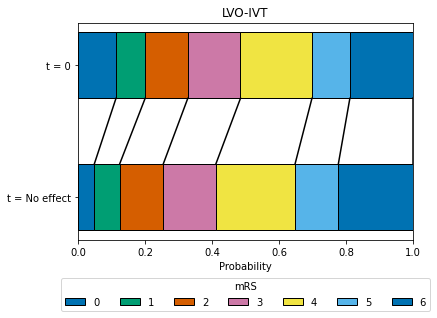

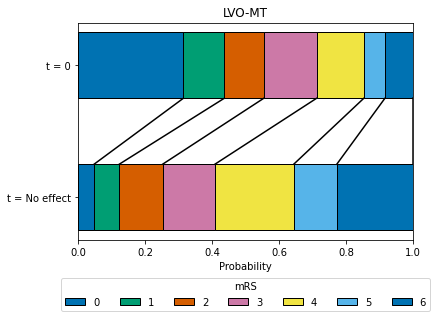

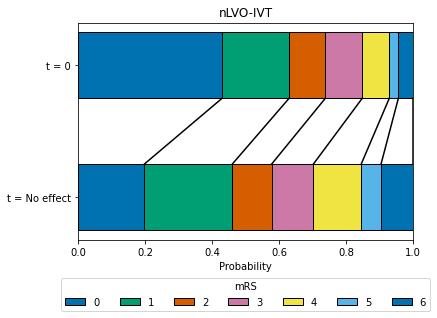

In [48]:
plot_info = [
    [all_distributions_bins_df.loc['no_effect_lvo_ivt_deaths'], 
     all_distributions_bins_df.loc['t0_treatment_lvo_ivt'], 'LVO-IVT'],
    [all_distributions_bins_df.loc['no_effect_lvo_mt_deaths'], 
     all_distributions_bins_df.loc['t0_treatment_lvo_mt'], 'LVO-MT'],
    [all_distributions_bins_df.loc['no_effect_nlvo_ivt_deaths'], 
     all_distributions_bins_df.loc['t0_treatment_nlvo_ivt'], 'nLVO-IVT']]

for info in plot_info:
    
    # Draw no effect distribution
    draw_horizontal_bar(info[0], 't = No effect')
    
    # Add legend now to prevent doubling all the labels:
    plt.legend(loc='center',ncol=7, title='mRS', 
               bbox_to_anchor=[0.5,0.0,0.0,-0.5])   # Legend below axis.
    
    # Draww t=0 distribution
    draw_horizontal_bar(info[1], 't = 0')
    
    # Darw connecting lines
    draw_connections(info[1], info[0])
    
    # Add general content
    label = info[2]
    plt.xlabel('Probability')
    plt.title(label)
    plt.xlim(0,1)
    plt.savefig(f'./images/{label}.jpg', dpi=300, bbox_inches='tight', 
        pad_inches=0.2)
    plt.show()

## References

de la Ossa Herrero N, Carrera D, Gorchs M, Querol M, Millán M, Gomis M, et al. Design and Validation of a Prehospital Stroke Scale to Predict Large Arterial Occlusion The Rapid Arterial Occlusion Evaluation Scale. Stroke; a journal of cerebral circulation. 2013 Nov 26;45. 

Emberson J, Lees KR, Lyden P, et al. _Effect of treatment delay, age, and stroke severity on the effects of intravenous thrombolysis with alteplase for acute ischaemic stroke: A meta-analysis of individual patient data from randomised trials._ The Lancet 2014;384:1929–35. doi:10.1016/S0140-6736(14)60584-5

Fransen, P., Berkhemer, O., Lingsma, H. et al. Time to Reperfusion and Treatment Effect for Acute Ischemic Stroke: A Randomized Clinical Trial. JAMA Neurol. 2016 Feb 1;73(2):190–6. DOI: 10.1001/jamaneurol.2015.3886

Goyal M, Menon BK, van Zwam WH, et al. _Endovascular thrombectomy after large-vessel ischaemic stroke: a meta-analysis of individual patient data from five randomised trials._ The Lancet 2016;387:1723-1731. doi:10.1016/S0140-6736(16)00163-X

Hui W, Wu C, Zhao W, Sun H, Hao J, Liang H, et al. Efficacy and Safety of Recanalization Therapy for Acute Ischemic Stroke With Large Vessel Occlusion. Stroke. 2020 Jul;51(7):2026–35. 

Lees KR, Bluhmki E, von Kummer R, et al. _Time to treatment with intravenous alteplase and outcome in stroke: an updated pooled analysis of ECASS, ATLANTIS, NINDS, and EPITHET trials_. The Lancet 2010;375:1695-703. doi:10.1016/S0140-6736(10)60491-6

McMeekin P, White P, James MA, Price CI, Flynn D, Ford GA. Estimating the number of UK stroke patients eligible for endovascular thrombectomy. European Stroke Journal. 2017;2:319–26. 

SAMueL-1 data on mRS before stroke (DOI: 10.5281/zenodo.6896710): https://samuel-book.github.io/samuel-1/descriptive_stats/08_prestroke_mrs.html